<a href="https://www.kaggle.com/code/kristiandemonteverde/spam-detector-model?scriptVersionId=208989584" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Spam Detector Classifcation Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Dataset

In [2]:
data = pd.read_csv("/kaggle/input/spam-email-classification/email.csv", encoding="latin-1")
data.columns = ["label", "message"]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5573 non-null   object
 1   message  5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Preprocessing

In [3]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

X = data["message"]
y = data["label"]

data.head()

,label,message
0,0.0,"Go until jurong point, crazy.. Available only ..."
1,0.0,Ok lar... Joking wif u oni...
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.0,U dun say so early hor... U c already then say...
4,0.0,"Nah I don't think he goes to usf, he lives aro..."


# Split the Data Into Testing and Training

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model

In [5]:
non_nan_indices = ~pd.isna(y_train)
X_train = X_train[non_nan_indices]
y_train = y_train[non_nan_indices]

vectorizer = TfidfVectorizer(min_df=1, stop_words="english")
extracted_X_train = vectorizer.fit_transform(X_train)

tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}
model = GridSearchCV(svm.SVC(), tuned_parameters)
model.fit(extracted_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

# Predicting the Data

In [6]:
y_pred = model.predict(vectorizer.transform(X_test))

# Conduct Accuracy and Report

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 98.83
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       958
         1.0       0.97      0.94      0.96       157

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



# Evaluating the Model

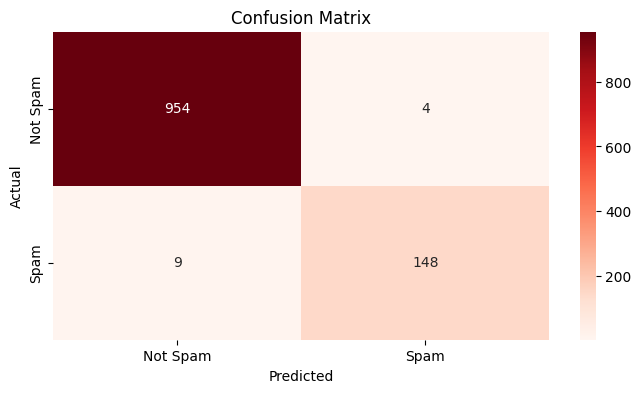

In [8]:
matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

# Model Prediction

In [9]:
new_email = ["Congratulations! You won a FREE $500 Gift Card!"]

new_email_features = vectorizer.transform(new_email)

prediction = model.predict(new_email_features)

if prediction[0] == 1:
    print("Prediction: Spam Detected")
else:
    print("Prediction: Not Spam")

Prediction: Spam Detected
